In [2]:
import numpy as np
import os
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import pandas as pd
import umap
%matplotlib inline

In [3]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [4]:
data_dir = 'data_lstm'

In [16]:
X = np.load(os.path.join(data_dir, 'x_feature_arima.npy'))
y = np.load(os.path.join(data_dir, '../y_new.npy'))
X.shape

(410, 81)

In [17]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X = pca.fit_transform(X,y)

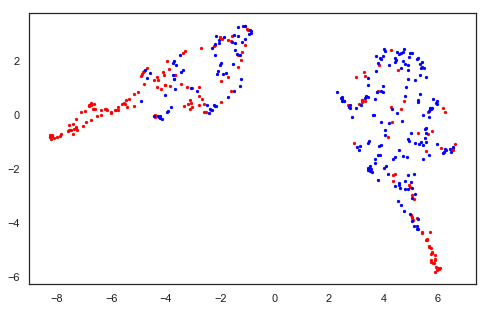

(410, 52)

In [18]:
# tsne, umap
def graph_embedding(X_emb_1, X_emb_0):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1, 1, 1)
    # ones are in red
    ax.scatter(X_emb_1[:,0], X_emb_1[:,1], c='red', s=5)
    # zeros are in blue
    ax.scatter(X_emb_0[:,0], X_emb_0[:,1], c='blue', s=5)
    plt.show()
#tsne = TSNE(n_components=2)
#X_emb = tsne.fit_transform(X)
reducer = umap.UMAP()
def repeated_umap(X, i):
    embeddings = []
    for e in range(i):
        X_emb = reducer.fit_transform(X)
        X_emb_1 = X_emb[np.argwhere(y==1).reshape(np.argwhere(y==1).shape[0])]
        X_emb_0 = X_emb[np.argwhere(y==0).reshape(np.argwhere(y==0).shape[0])]
        graph_embedding(X_emb_1, X_emb_0)
        embeddings.append(X_emb)
    embeddings = np.concatenate(embeddings, axis=1)
    X = np.concatenate([X, embeddings],axis=1)
    return X
X = repeated_umap(X, 1)
X.shape

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(328, 52)

In [20]:
model = LogisticRegression(solver='saga')
model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
pred = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, f1_score
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)

In [23]:
print('Accuracy score: {}\t F1 score: {}.'.format(acc, f1))

Accuracy score: 0.7682926829268293	 F1 score: 0.7710843373493975.
